In [1]:
### Import the LogisticRegression and other necessary Classes

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('all.csv')
print(df)

      Unnamed: 0     type                                    content_cleaned  \
0              1  article  speaker robin vos r rochester senate majority ...   
1             14  article                                       page looking   
2             15  article  contrary narrative pushed mainstream covid 19 ...   
3             24  article  programming alert exclusive documentary origin...   
4             30  article  buffalo ny wivbmayor byron brown handing mask ...   
...          ...      ...                                                ...   
1742        1573  article  rush transcript week george stephanopoulos air...   
1743        1576  article  unprecedented moment american history need unp...   
1744        1578  article  gov greg abbott tuesday issued amount statewid...   
1745        1586  article  pulled trajectory chart work new version added...   
1746        1588  article  fox business lou dobbs relentlessly grilled tr...   

      label  
0         1  
1         1

Text(0.5, 1.0, 'Number of Fake vs Real News before Oversampling')

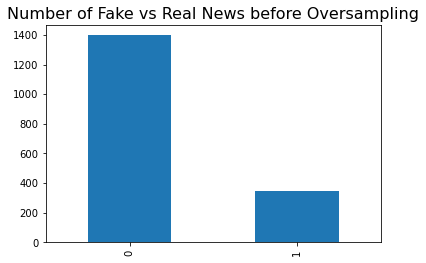

In [3]:
#Visualization before oversampling
import matplotlib.pyplot as plt
ax = df['label'].value_counts().plot(kind='bar')
plt.title('Number of Fake vs Real News before Oversampling',fontsize= 16)

In [4]:
X = df['content_cleaned']
y = df['label']
print(X,y)

0       speaker robin vos r rochester senate majority ...
1                                            page looking
2       contrary narrative pushed mainstream covid 19 ...
3       programming alert exclusive documentary origin...
4       buffalo ny wivbmayor byron brown handing mask ...
                              ...                        
1742    rush transcript week george stephanopoulos air...
1743    unprecedented moment american history need unp...
1744    gov greg abbott tuesday issued amount statewid...
1745    pulled trajectory chart work new version added...
1746    fox business lou dobbs relentlessly grilled tr...
Name: content_cleaned, Length: 1747, dtype: object 0       1
1       1
2       1
3       1
4       1
       ..
1742    0
1743    0
1744    0
1745    0
1746    0
Name: label, Length: 1747, dtype: int64


In [5]:
### Create TfidfVectorizer. Fit and transform.
vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# learn the 'vocabulary' of X & transform into a 'document-term matrix'
X_dtm = vectorizer.fit_transform(X)

In [6]:
# instantiate a logistic regression model
classifier = LogisticRegression()

### Model performance with cross validation (cv=5); No application of SMOTE 

In [7]:
#Cross Validation - will perform prediction and evaluation
#to obtain average scoring from partitioned training and testing datasets
#using only the fitted training data

scores = cross_val_score(classifier, X_dtm, y, cv=5)
print('Accuracy', np.mean(scores), scores)
precisions = cross_val_score(classifier, X_dtm, y, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_dtm, y, cv=5, scoring='recall')
print('Recall', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, X_dtm, y, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

Accuracy 0.8271567744576341 [0.8        0.81142857 0.84813754 0.84813754 0.82808023]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision 0.8 [0. 1. 1. 1. 1.]
Recall 0.13714285714285715 [0.         0.05714286 0.24285714 0.24285714 0.14285714]
F1 0.22794346070208138 [0.         0.10810811 0.3908046  0.3908046  0.25      ]


### Model performance with cross validation (cv=5); Application of SMOTE to handle imbalanced dataset

In [8]:
# import SMOTE module from imblearn library 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_dtm_res, y_res = sm.fit_sample(X_dtm, y) 


In [9]:
print('After OverSampling, the shape of train_X: {}'.format(X_dtm_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0))) 

After OverSampling, the shape of train_X: (2794, 57044)
After OverSampling, the shape of train_y: (2794,) 

After OverSampling, counts of label '1': 1397
After OverSampling, counts of label '0': 1397


In [10]:
import collections
from collections import Counter
c = Counter(y_res)
print(c)

Counter({1: 1397, 0: 1397})


In [11]:
df_oversampling = pd.DataFrame.from_records(list(dict(c).items()), columns=['label','count'])
df_oversampling

,label,count
0,1,1397
1,0,1397


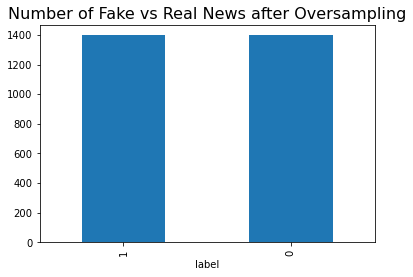

In [12]:
#visualization after oversampling
ax = df_oversampling.plot.bar(x='label', y='count')
plt.title("Number of Fake vs Real News after Oversampling",fontsize= 16)
ax.get_legend().remove()

In [13]:
# instantiate a logistic regression model
classifier = LogisticRegression()


In [14]:
scores = cross_val_score(classifier, X_dtm_res, y_res, cv=5)
print('Accuracy', np.mean(scores), scores)
precisions = cross_val_score(classifier, X_dtm_res, y_res, scoring='precision')
print('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_dtm_res, y_res, cv=5, scoring='recall')
print('Recall', np.mean(recalls), recalls)
f1s = cross_val_score(classifier, X_dtm_res, y_res, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

Accuracy 0.8761780188636903 [0.71198569 0.8783542  0.92307692 0.94991055 0.91756272]
Precision 0.9991489361702127 [1.         1.         1.         1.         0.99574468]
Recall 0.7532744495647722 [0.425      0.75714286 0.84587814 0.89964158 0.83870968]
F1 0.8464920696443834 [0.59649123 0.86178862 0.91650485 0.94716981 0.91050584]
